In [1]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib

import matplotlib.pyplot as plt
from scipy import stats
from scipy.stats import skew
from scipy.stats import norm
from scipy.stats.stats import pearsonr
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn import preprocessing
%matplotlib inline
import sys
sys.path.append("/content/drive/MyDrive/MIDA2/IntelligentMobilityProject/Code")
np.set_printoptions(precision=5, suppress=True)

In [3]:

vars = 6
regions = False
if vars != 7:
  regions = False
if_regions = '_regions' if regions else ''
HC_base_path = "/content/drive/MyDrive/MIDA2/IntelligentMobilityProject/Code/Data/HC/"
algo = "HC"
sep = "_"
file_type = ".npy"
ds_path = f'/content/drive/MyDrive/MIDA2/IntelligentMobilityProject/Survey+dataset/4_DNA_{vars}values{if_regions}_v2.csv'
df_DNA = pd.read_csv(ds_path)#.drop("Gender", axis=1)

In [11]:
metric="VDM"
# linkages = ["single", "complete", "average", "weighted"]#, "ward", "centroid", "median"]
linkages = ["weighted"]
clusters_range = range(2,30)

# Clustering Analysis


In [4]:
df_DNA

,InternetUsers,Concern_environmental_impacts,grouped_Age,Would_subsribe_car_sharing_if_available,Preference_tolls_or_traffic_limitation,Gender
0,0.758621,0.4,0.59,0.333333,0.00,0.0
1,0.689655,0.8,0.11,0.333333,0.25,1.0
2,0.551724,0.6,0.59,0.166667,0.00,1.0
3,0.931034,0.8,1.00,0.000000,0.50,1.0
4,0.327586,0.8,0.35,0.333333,0.00,1.0
...,...,...,...,...,...,...
26600,0.551724,0.2,0.18,0.666667,0.50,0.0
26601,0.551724,0.4,0.26,0.000000,0.00,0.0
26602,0.551724,0.7,0.26,0.333333,0.00,1.0
26603,0.551724,0.7,0.35,0.666667,0.25,1.0


In [5]:
# just leaving this up for reference
cleanup_nums = {"Concern_environmental_impacts":
                  {
                      '1': 0,
                      '2': 1,
                      '3': 2,
                      '4': 3,
                      '5': 4,
                      "Don't know": 5,
                      '6': 6,
                      '7': 7,
                      '8': 8,
                      '9': 9,
                      '10': 10 
                  },
                "grouped_Age":
                  {
                      '16:23': 19.5,
                      '23:27': 25,
                      '27:30': 28.5,
                      '30:35': 32.5,
                      '35:39': 37,
                      '39:43': 41,
                      '43:47': 45,
                      '47:51': 49,
                      '51:54': 52.5,
                      '54:85': 69.5
                  },
                "Would_subsribe_car_sharing_if_available":
                  {
                      "Don't know / No answer": 0,
                      'No, I would not be interested in this service': 1,
                      'Maybe yes, maybe not. I would need to test the service before taking a decision': 2,
                      'Yes without any influence on my car ownership': 3,
                      'Yes, instead of purchasing a new car': 4,
                      'Yes and I would give up one car I currently own': 5,
                      "Yes I'm already client of a car sharing service": 6
                  },
                "Preference_tolls_or_traffic_limitation":
                  {
                      'No preferences': 0,
                      'Probably more acceptable to limit road traffic': 1,
                      'Probably more acceptable to pay for less congestion': 2,
                      'Definitely more acceptable to pay for less congestion': 3,
                      'Definitely more acceptable to limit road traffic': 4
                  },
                "Gender":
                  {
                      'Female': 0,
                      'Male': 1
                  }
                }

## Hierarchical Clustering

In [6]:
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster, inconsistent
from scipy.spatial.distance import cdist, pdist

In [7]:
def PlotDendrogram(Z, title=""):
    plt.figure(figsize=(25, 10))
    font = {'family' : 'sans', 'size'   : 18}
    plt.rc('font', **font)
    plt.title('Hierarchical Clustering Dendrogram')
    plt.xlabel('Sample Index')
    plt.ylabel('Merge Distance')
    dendrogram(Z, 
        leaf_rotation=90.,  # rotates the x axis labels
        leaf_font_size=8.,  # font size for the x axis labels
    )
    plt.xticks([])
    plt.show()

In [8]:
def ComputeWSSBSS(X,Z,k_values=range(1,20)):
    wss_values = []
    bss_values = []

    for k in k_values:
        clustering = fcluster(Z, k, criterion='maxclust')
        frequency = np.bincount(clustering)
        index = np.nonzero(frequency)[0]
        
        centroids = [np.mean(X[clustering==c],axis=0) for c in index]
        
        cdist(X, centroids, 'euclidean')
        D = cdist(X, centroids, 'euclidean')
        cIdx = np.argmin(D,axis=1)
        d = np.min(D,axis=1)

        avgWithinSS = sum(d)/len(X)

        # Total with-in sum of square
        wss = sum(d**2)

        tss = sum(pdist(X)**2)/len(X)

        bss = tss-wss

        wss_values += [wss]
        bss_values += [bss]
    return wss_values,bss_values

In [ ]:
def PlotKneeElbow(bss_values,wss_values,k_values,title=""):
    fig = plt.figure(figsize=(24,12))
    font = {'family' : 'sans', 'size'   : 12}
    plt.rc('font', **font)
    plt.plot(k_values, wss_values, 'bo-', color='red', label='WSS')
    plt.plot(k_values, bss_values, 'bo-', color='blue', label='BSS')
    plt.grid(True)
    plt.xlabel('Number of clusters')
    plt.ylabel('BSS & WSS')
    plt.xticks(k_values)
    plt.legend()
    plt.title(title);

In [ ]:
# Z = {}
# #size = -1
# Z['Euclidean'] = linkage(df_DNA, 'complete')
# Z['HEOM'] = linkage(df_DNA, 'complete', metric=heom_metric_C.heom)

In [ ]:
  # for key in Z.keys():
  #   PlotDendrogram(Z[key],key+' Distance')

#### Save

In [ ]:

link = 'ward'

HC_path = f'/content/drive/MyDrive/MIDA2/IntelligentMobilityProject/Code/Data/HC/{metric}{vars}{if_regions}/HC_{metric}_{link}.npy'

In [ ]:
# np.savetxt(HC_path, Z[metric], delimiter=',')

#### Load

In [ ]:

Z = {}
Z[metric] = np.load(HC_path)

In [ ]:
# wss = {}
# bss = {}

# for key in Z.keys():
#     wss[key],bss[key] = ComputeWSSBSS(df_DNA,Z[key],range(1,20))

In [ ]:
# for key in Z.keys():
#     PlotKneeElbow(bss[key],wss[key],range(1,20),key+' Distance')

### Post Processing

In [ ]:
# metric = "HEOM"
# k = 53
# cluster = fcluster(Z[metric], k , criterion='maxclust')
# df_DNA_clusters = df_DNA.copy()
# df_DNA_clusters["cluster"] = cluster

def post_processing(df, top=10, offset=0):
  # df has "cluster" column
  groupby_clusters = df[["cluster", 'InternetUsers']].groupby("cluster").count()
  groupby_clusters.columns = ['count']
  sorted_clusters = groupby_clusters.sort_values(by='count', ascending=False) \
    [offset:offset+top].index
  return groupby_clusters[groupby_clusters.index.isin(sorted_clusters)] \
    .sort_values(by='count', ascending=False), \
    df[df['cluster'].isin(sorted_clusters.to_numpy())]

In [ ]:
# post_processing(df_DNA_clusters)

In [ ]:
# save_path = "/content/drive/MyDrive/MIDA2/IntelligentMobilityProject/Survey+dataset/"
# post_processing(df_DNA_clusters)[1].to_csv(f'{save_path}5_postprocessing_clusters.csv', index=False)

## Plot grids

In [ ]:
for i, col in enumerate(df_DNA.columns):
  print(i, col)

0 InternetUsers
1 Concern_environmental_impacts
2 grouped_Age
3 Would_subsribe_car_sharing_if_available
4 Preference_tolls_or_traffic_limitation
5 Gender


In [ ]:
def plotRelation(df, save_path, x, y, k, hue_order=None, figsize=10, dpi=300):
  plt.clf()
  # plt.rcParams['figure.figsize'] = (figsize, figsize)
  fig, ax = plt.subplots()
  fig_distr = sns.histplot(data=df, x=x, y=y).set_title('Distribution of values between these vars')
  fig = fig_distr.figure
  fig.set_size_inches(figsize, figsize)
  fig.savefig(f"{save_path}_distr.png", dpi=dpi)
  plt.clf()
  # plt.rcParams['figure.figsize'] = tuple(s * figsize for s in (k*len(df[x].unique())/3, 1))
  fig_points = sns.stripplot(
              data=df,
              x=x, 
              y=y, 
              hue="cluster",
              hue_order=hue_order,
              jitter=0.4,
              dodge=True,
              size=5,
              palette=sns.color_palette("Paired", k),            
              )
  fig = fig_points.figure
  width = figsize*k*len(df[x].unique()/3)
  print(width)
  max_width = int(412.5 * 80 / dpi) # 110 for dpi=300
  if width > max_width:
    print("width reduced from", width, end=' ')
    width = max_width
    # found this width with trial and error, hard work
    print("to", width)
    
  fig.set_size_inches(width, figsize)
  fig_points.figure.savefig(f"{save_path}_points.png", dpi=dpi)

In [ ]:
def saveVisualization(df_DNA, save_path, metric="HEOM", k=5, k_order=None, top=None, offset=0):
  if metric in ["HEOM", 'WHEOM']:
    # k is used
    cluster = fcluster(Z[metric], k , criterion='maxclust')
  else:
    raise NotImplementedError()
  df_DNA_clusters = df_DNA.copy()
  df_DNA_clusters["cluster"] = cluster
  if top:
    df_clusters_size, df_DNA_clusters = post_processing(
        df_DNA_clusters, top=top, offset=offset)
    print(df_clusters_size)
    k = top
    k_order = [cluster_i for cluster_i in df_clusters_size.index]
    print(k_order)
  
  cols = df_DNA.columns
  for i in range(len(cols)):
    for j in range(i+1, len(df_DNA.columns)):
      print(i,j)
      plotRelation(df_DNA_clusters, f"{save_path}{i}{j}", cols[j], cols[i], k, hue_order=k_order)

0 1
220
width reduced from 220 to 110
0 2
200
width reduced from 200 to 110
0 3
140
width reduced from 140 to 110
0 4
100
0 5
40
1 2
200
width reduced from 200 to 110
1 3
140
width reduced from 140 to 110
1 4
100
1 5
40
2 3
140
width reduced from 140 to 110
2 4
100
2 5
40
3 4
100
3 5
40
4 5
40


<Figure size 432x288 with 0 Axes>

<Figure size 7920x720 with 0 Axes>

<Figure size 7920x720 with 0 Axes>

<Figure size 7920x720 with 0 Axes>

<Figure size 7200x720 with 0 Axes>

<Figure size 2880x720 with 0 Axes>

<Figure size 7920x720 with 0 Axes>

<Figure size 7920x720 with 0 Axes>

<Figure size 7200x720 with 0 Axes>

<Figure size 2880x720 with 0 Axes>

<Figure size 7920x720 with 0 Axes>

<Figure size 7200x720 with 0 Axes>

<Figure size 2880x720 with 0 Axes>

<Figure size 7200x720 with 0 Axes>

<Figure size 2880x720 with 0 Axes>

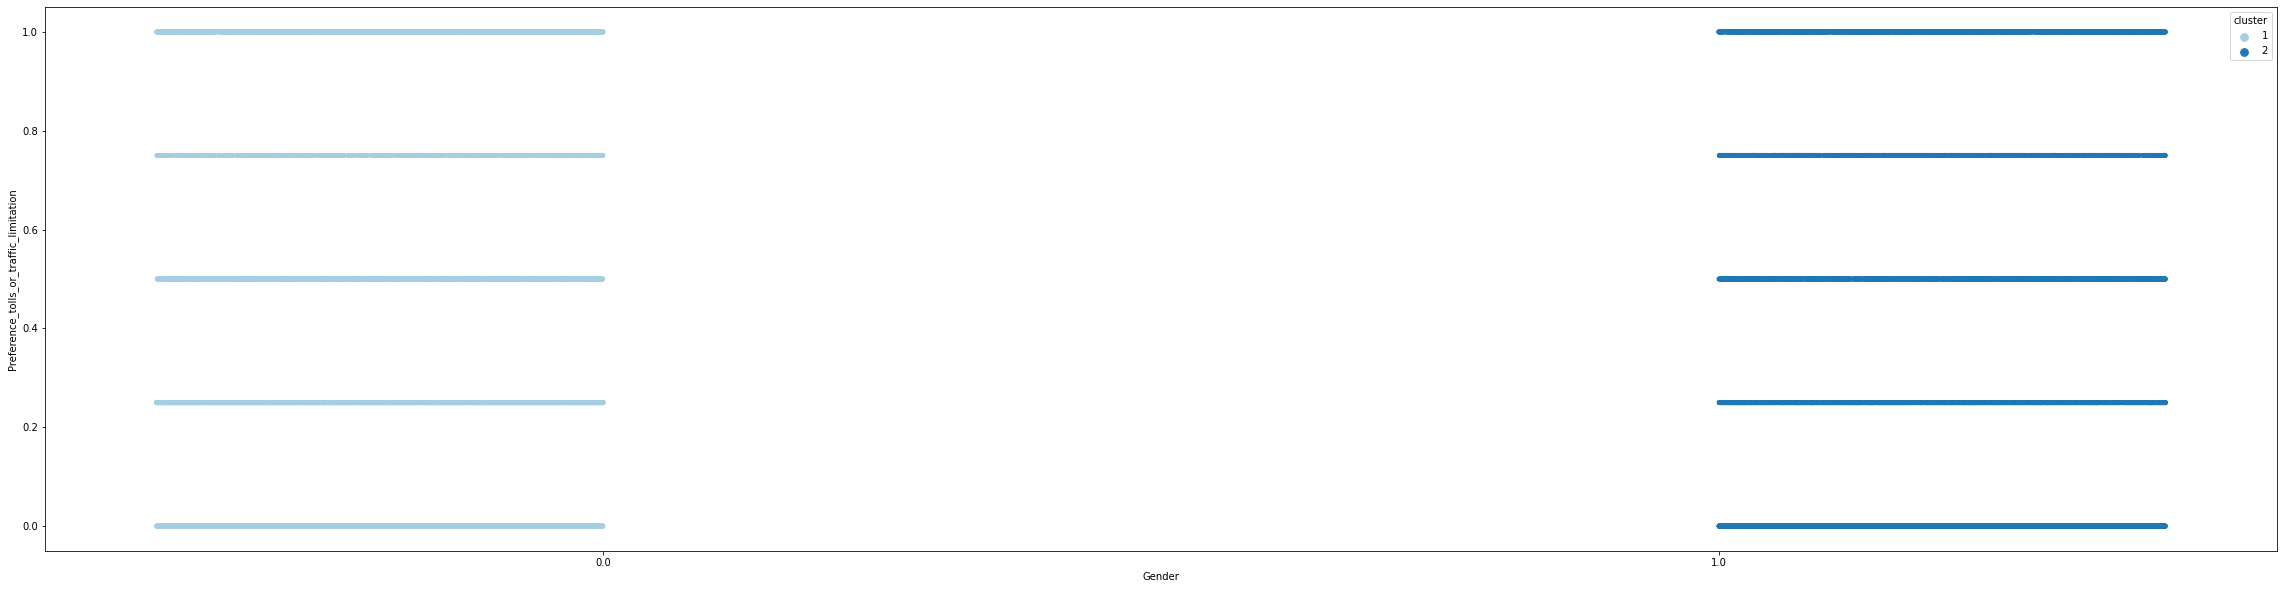

In [ ]:
k = 2
top = 0
offset = 0

if_top = f'_top_{top}' if top else ''
if_offset = f'_offset_{offset}' if offset else ''

save_path = f"/content/drive/MyDrive/MIDA2/IntelligentMobilityProject/Pictures/HC/Detailed/" \
            f"{metric}{vars}/linkage_{link}/k_{k}{if_top}{if_offset}/"
saveVisualization(df_DNA, save_path, metric=metric, k=k, top=top, offset=offset)

In [ ]:
x="Concern_environmental_impacts"
y="InternetUsers"
k = 5
figsize = 10

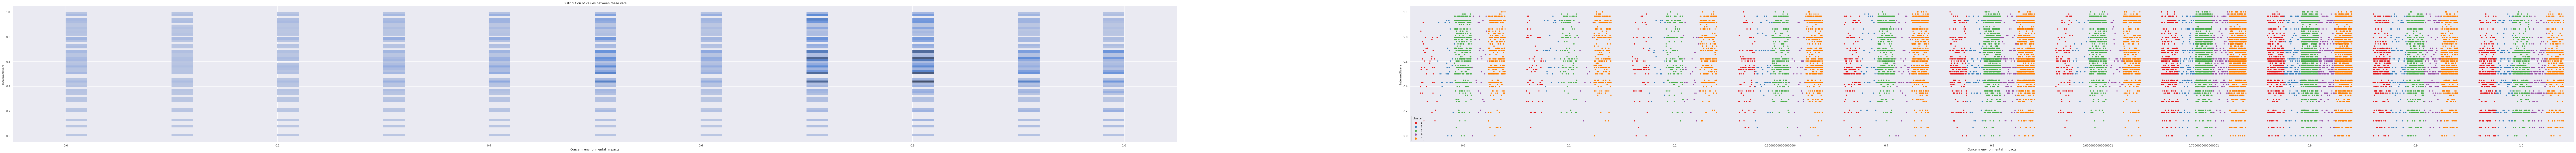

In [ ]:
import seaborn as sns
sns.set_theme()

def plotGrid(df_DNA, k, metric, size=None, y_vars=None):
  cluster = fcluster(Z[metric], k , criterion='maxclust')
  if size is None:
    df_DNA_clusters = df_DNA.copy()
  else:
    df_DNA_clusters = df_DNA[:size].copy()
  df_DNA_clusters["cluster"] = cluster
  
  g = sns.PairGrid(df_DNA_clusters, 
                   hue="cluster",
                   palette="Set1",
                   height=9,
                   aspect=k,
                   #x_vars=["Preference_tolls_or_traffic_limitation"],
                   y_vars=y_vars,
                   )
  g.map_diag(sns.histplot)
  #g.map_offdiag(sns.swarmplot)
  g.map_offdiag(sns.stripplot, jitter=0.4, dodge=True)
  g.add_legend()
  return g

In [ ]:
# 5,7,8,9,11,16 20

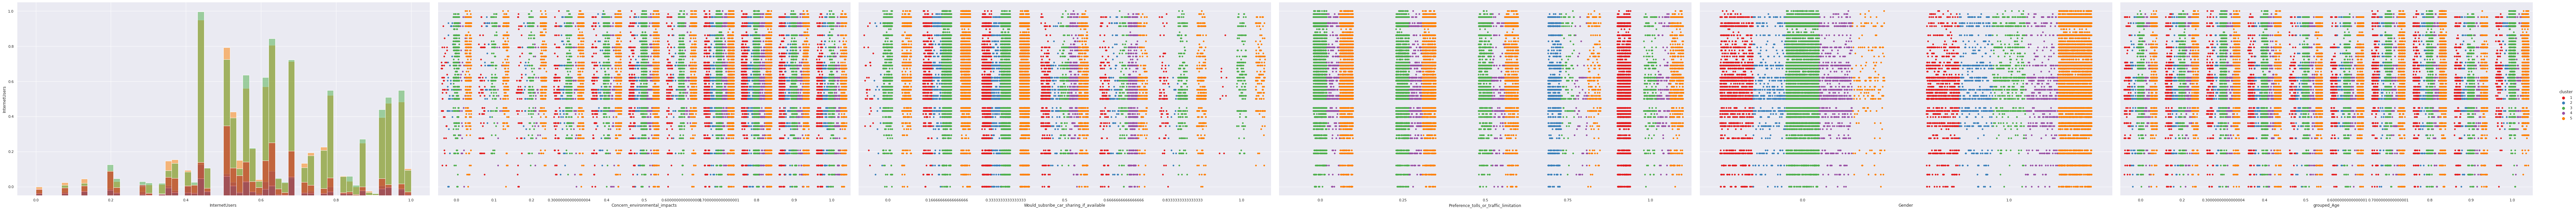

In [ ]:
g = plotGrid(df_DNA, 5, 'HEOM', y_vars=["InternetUsers"])

In [ ]:
g.fig.savefig("/content/drive/MyDrive/MIDA2/IntelligentMobilityProject/Pictures/HC/HC_complete_HEOM.png", dpi=300)

## Check number and size of clusters

In [13]:

for link in linkages:
  HC_path = f'/content/drive/MyDrive/MIDA2/IntelligentMobilityProject/Code/' \
            f'Data/HC/{metric}{vars}{if_regions}/HC_{metric}_{link}.npy'
  Z = {}
  Z[metric] = np.load(HC_path)
  print(f'\n\n\n{link}:\n')
  for n_clusters in clusters_range:
    cluster_labels = fcluster(Z[metric], n_clusters, criterion='maxclust')
    df_DNA['cluster'] = cluster_labels
    print(df_DNA['cluster'].value_counts())




weighted:

2    25015
1     1590
Name: cluster, dtype: int64
2    23688
1     1590
3     1327
Name: cluster, dtype: int64
2    23688
1     1590
4      792
3      535
Name: cluster, dtype: int64
2    16436
3     7252
1     1590
5      792
4      535
Name: cluster, dtype: int64
3    16436
4     7252
1     1347
6      792
5      535
2      243
Name: cluster, dtype: int64
3    16436
4     7252
1     1347
5      535
7      427
6      365
2      243
Name: cluster, dtype: int64
3    16436
5     7249
1     1347
6      535
8      427
7      365
2      243
4        3
Name: cluster, dtype: int64
3    16436
5     7249
1     1347
9      427
8      365
6      295
2      243
7      240
4        3
Name: cluster, dtype: int64
4     16436
6      7249
1      1347
10      427
9       365
7       295
8       240
3       222
2        21
5         3
Name: cluster, dtype: int64
4     10018
7      7249
5      6418
1      1347
11      427
10      365
8       295
9       240
3       222
2        21
6         